# Fitting a model to data (Hogg, Bovy, Lang 2010)
This tutorial works through (not yet) all of the examples in the excellent paper by Hogg, Bovy, and Lang (https://arxiv.org/abs/1008.4686).

In [1]:
%matplotlib inline
import numpy as np # 1.13.3
import matplotlib.pyplot as plt #2.1.1
import pandas as pd # 0.22.0
import plot_helper as plot_helper

import emcee # 2.2.1
import corner # 2.0.1
import progressbar # 3.34.3

import seaborn as sns # 0.8.1

This is our dataset:

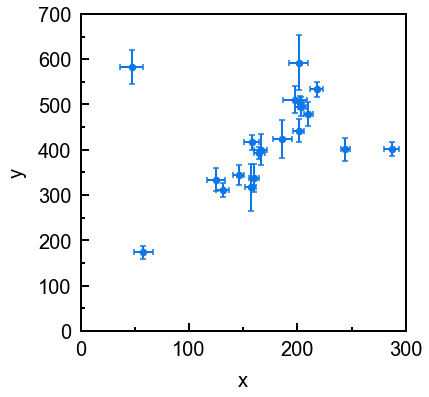

In [2]:
df=pd.read_csv('data.csv',delimiter=',')
plot_helper.plot1(df['x'],df['y'],df['sx'],df['sy'],[0,300],[0,700])

### Exercise 1: Standard weighted least squares fit

Minimising the objective function
\begin{equation}
\chi^2=\sum^N_{i=1}\frac{[y_i-f(x_i)]^2}{\sigma^2_{yi}}
\end{equation}
gives directly the best fit parameters $b$ and $m$:
\begin{equation}
\begin{bmatrix}
b \\ m
\end{bmatrix}
=\mathbf{X}=[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{A}]^{-1}[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{Y}]
\end{equation}

b,m =  [ 34.04772776   2.23992083]
eb,em = 18.2461667493 0.107780476541
Chi^2 =  18.6807699112


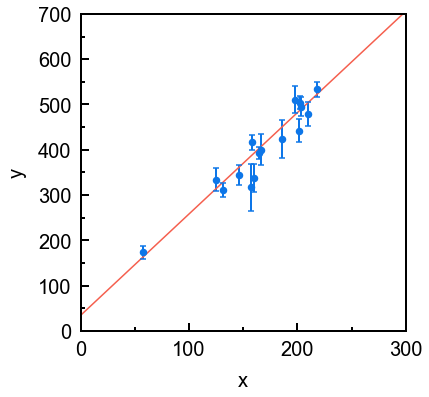

In [4]:
x=df['x'].iloc[4:]
y=df['y'].iloc[4:]
sy=df['sy'].iloc[4:]

Y=y.values
A=np.hstack(((np.ones(len(Y))).reshape(-1,1),(x.values).reshape(-1,1)))
C=np.diag(sy.values*sy.values)
Cinv=np.linalg.inv(C)
cov=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))) # Covariance matrix
X1=np.dot(A.T,np.dot(Cinv,Y))
X=np.dot(cov,X1)
print('b,m = ', X)
print ('eb,em =', np.sqrt(cov[0,0]), np.sqrt(cov[1,1])) # Standard errors from diagonal of covariance matrix

### Chi2 ###
chi2=np.dot(np.transpose(Y-np.dot(A,X)),np.dot(Cinv,(Y-np.dot(A,X))))
print('Chi^2 = ', chi2)

fitx=np.arange(0,300)
fity=X[1]*fitx+X[0]
plot_helper.plot2(x,y,sy,fitx,fity,[0,300],[0,700])

m =  [ 2.43316308]
em = 0.0298710002213
Chi^2 =  22.1628037588


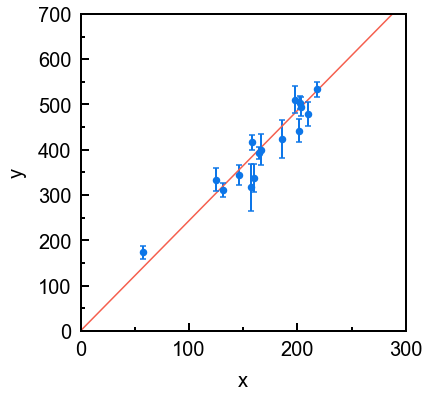

In [9]:
## Exercise 1.1: one-parameter fit
x=df['x'].iloc[4:]
y=df['y'].iloc[4:]
sy=df['sy'].iloc[4:]

Y=y.values
A=(x.values).reshape(-1,1)
C=np.diag(sy.values*sy.values)
Cinv=np.linalg.inv(C)
cov=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))) # Covariance matrix
X1=np.dot(A.T,np.dot(Cinv,Y))
X=np.dot(cov,X1)
print('m = ', X)
print ('em =', np.sqrt(cov[0,0])) # Standard errors from diagonal of covariance matrix

### Chi2 ###
chi2=np.dot(np.transpose(Y-np.dot(A,X)),np.dot(Cinv,(Y-np.dot(A,X))))
print('Chi^2 = ', chi2)

fitx=np.arange(0,300)
fity=X[0]*fitx
plot_helper.plot2(x,y,sy,fitx,fity,[0,300],[0,700])

### Exercise 2: Standard weighted least squares fit with outliers

b,m =  [ 213.27349198    1.07674752]
eb,em = 14.3940331072 0.0774067831658
Chi^2 =  289.963722782


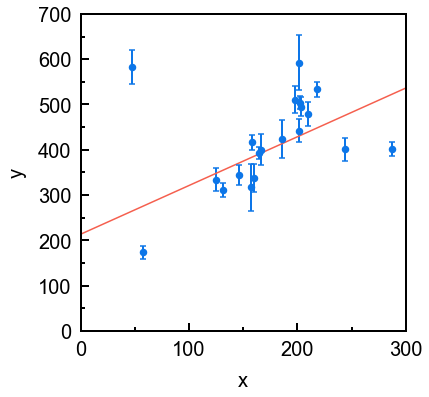

In [6]:
x=df['x']
y=df['y']
sy=df['sy']

Y=y.values
A=np.hstack(((np.ones(len(Y))).reshape(-1,1),(x.values).reshape(-1,1)))
C=np.diag(sy.values*sy.values)
Cinv=np.linalg.inv(C)
cov=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))) # Covariance matrix
X1=np.dot(A.T,np.dot(Cinv,Y))
X=np.dot(cov,X1)
print('b,m = ', X)
print ('eb,em =', np.sqrt(cov[0,0]), np.sqrt(cov[1,1])) # Standard errors from diagonal of covariance matrix

### Chi2 ###
chi2=np.dot(np.transpose(Y-np.dot(A,X)),np.dot(Cinv,(Y-np.dot(A,X))))
print('Chi^2 = ', chi2)

fitx=np.arange(0,300)
fity=X[1]*fitx+X[0]
plot_helper.plot2(x,y,sy,fitx,fity,[0,300],[0,700])

### Exercise 3: Standard weighted least squares quadratic fit 

q,b,m =  [  7.28946265e+01   1.59605045e+00   2.29888841e-03]
eq,eb,em = 38.9115551946 0.579747912517 0.00203385870874
Chi^2 =  17.4031719149


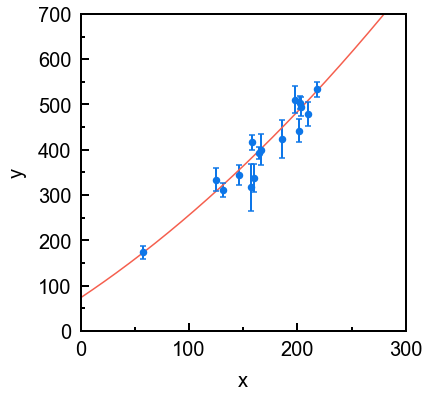

In [6]:
# Just add one more column to A

x=df['x'].iloc[4:]
y=df['y'].iloc[4:]
sy=df['sy'].iloc[4:]

Y=y.values
A=np.hstack(((np.ones(len(Y))).reshape(-1,1),(x.values).reshape(-1,1),((x.values)**2).reshape(-1,1)))
C=np.diag(sy.values*sy.values)
Cinv=np.linalg.inv(C)
cov=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))) # Covariance matrix
X1=np.dot(A.T,np.dot(Cinv,Y))
X=np.dot(cov,X1)
print('q,b,m = ', X)
print ('eq,eb,em =', np.sqrt(cov[0,0]), np.sqrt(cov[1,1]),np.sqrt(cov[2,2])) # Standard errors from diagonal of covariance matrix

### Chi2 ###
chi2=np.dot(np.transpose(Y-np.dot(A,X)),np.dot(Cinv,(Y-np.dot(A,X))))
print('Chi^2 = ', chi2)

fitx=np.arange(0,300)
fity=X[2]*fitx**2+X[1]*fitx+X[0]
plot_helper.plot2(x,y,sy,fitx,fity,[0,300],[0,700])

# The generative model
Our generative model assumes that $y=mx+b$, and that each true $y$ value has a y-direction offset drawn from a normal distribution. The probability of any $y_i$ given the parameters is thus
\begin{equation}
p(y_i|x_i,\sigma_{yi},m,b)=\frac{1}{\sqrt{2\pi\sigma_{yi}^2}}\exp\left(-\frac{[y_i-mx_i-b]^2}{2\sigma_{yi}^2}\right).
\end{equation}
The likelihood of the entire dataset is the product of the individual $p(y_i|params)$s. Maximising the log likelihood is therefore equivalent to $\chi^2$ minimisation.

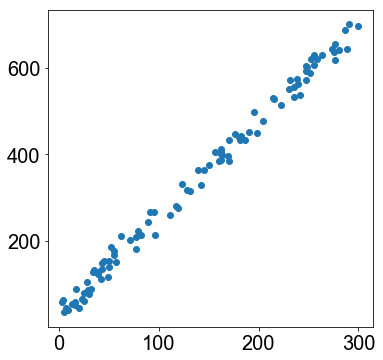

In [17]:
def genmodel(b,m,xi,syi):
    return(np.random.normal(b+xi*m,syi))

b,m=34.04772776,2.23992083
syi=20
xi=np.random.uniform(0,300,100)
yi=genmodel(b,m,xi,syi)
    
plt.plot(xi,yi,'o'); plt.show()

# The mixture model, exercises 6-7
We now model our data as being drawn from a mixture of two Gaussians, one which is the 'true' relation and one which is a distribution of outliers. This mixture model is generated by marginalising an 'exponential' model which contains $N$ latent classifying labels $q_i$ for each data point.
\begin{equation}
L\propto\prod_{i=1}^N\left[\frac{1-P_b}{\sqrt{2\pi\sigma^2_{yi}}}\exp\left(-\frac{[y_i-mx_i-b]^2}{2\sigma_{yi}^2}\right)+\frac{P_b}{\sqrt{2\pi[V_b+\sigma_{yi}^2]}}\exp\left(-\frac{[y_i-Y_b]^2}{2[V_b+\sigma_{yi}^2]}\right)\right]
\end{equation}

In [14]:
def lnlike(theta,x,y,yerr):
    b,m,Pb,Yb,lnVb=theta
    Vb=np.exp(lnVb)
    like=np.prod((1-Pb)/(np.sqrt(2*np.pi*yerr**2))*np.exp(-(y-m*x-b)**2/(2*yerr**2))+Pb/(np.sqrt(2*np.pi*(Vb+yerr**2)))*np.exp(-(y-Yb)**2/(2*(Vb+yerr**2))))

    return np.log(like)

def lnprior(theta):
    b,m,Pb,Yb,lnVb=theta
    
    if not (-100<b<150 and 0<m<5 and 0<Pb<1 and 0<Yb<1000 and -5<lnVb<5) : 
        return -np.inf # Hard-cutoff for positive value constraint    
    return 0

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [15]:
x=df['x'].values
y=df['y'].values
yerr=df['sy'].values

ndim,nwalkers,threads,iterations,tburn=5,100,8,5000,2500
labels=["$b$","$m$","$Pb$","$Yb$","$lnVb$"]
#parametertruths=[1,2]
pos=[np.array([
    34.04772776*(1+0.05*np.random.randn()),
    2.23992083*(1+0.05*np.random.randn()),
    0.5*(1+0.05*np.random.randn()),
    500*(1+0.05*np.random.randn()),
    1*(1+0.05*np.random.randn())]) for i in range(nwalkers)]
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnprob,a=2,args=(x,y,yerr),threads=threads)

 99% (4992 of 5000) |#################### | Elapsed Time: 0:00:55 ETA:  0:00:00

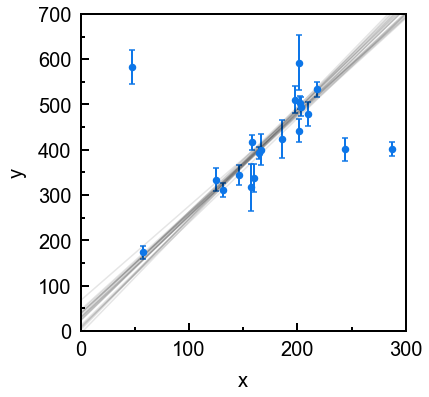

In [16]:
### Start MCMC
iterations=iterations
bar=progressbar.ProgressBar(max_value=iterations)
for i, result in enumerate(sampler.sample(pos, iterations=iterations)):
    bar.update(i)
### Finish MCMC

samples=sampler.chain[:,:,:].reshape((-1,ndim)) # shape = (nsteps, ndim)

df0=pd.DataFrame(samples)
df0.to_csv(path_or_buf='samplesout_.csv',sep=',')
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)
            
#plot_helper.plottraces(samples,labels,parametertruths,nwalkers,iterations,1)
fig=corner.corner(samplesnoburn, labels=labels,truths=None,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 10},verbose=False)
fig.savefig("triangle.pdf")

plot_helper.plot3(x,y,yerr,samplesnoburn,[0,300],[0,700])

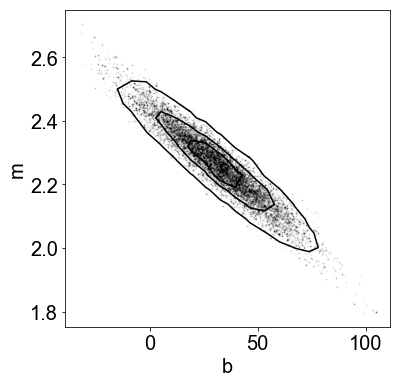

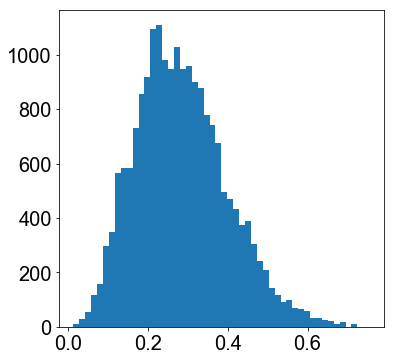

In [14]:
ndim,nwalkers,threads,iterations,tburn=5,100,8,5000,2500
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)

size=20000

marr=samplesnoburn[:size,1]
barr=samplesnoburn[:size,0]
Pbarr=samplesnoburn[:size,2]

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)

xbins, ybins, sigma = compute_sigma_level(barr, marr)
plt.contour(xbins, ybins, sigma.T, levels=[0.393,0.683, 0.955],colors='k')
plt.plot(barr, marr, 'ok',ms=1, alpha=0.05); 
ax=plt.gca(); ax.set_xlabel('b'); ax.set_ylabel('m'); plt.show()

plt.hist(Pbarr,bins=50); plt.show()


### Exercise 8

In [68]:
x=df['x'].iloc[:].values
y=df['y'].iloc[:].values
sy=df['sy'].iloc[:].values

def fit(x,y,sy):
    Y=y
    A=np.hstack(((np.ones(len(Y))).reshape(-1,1),(x).reshape(-1,1)))
    C=np.diag(sy*sy)
    Cinv=np.linalg.inv(C)
    cov=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))) # Covariance matrix
    X1=np.dot(A.T,np.dot(Cinv,Y))
    X=np.dot(cov,X1)
    return(X[1],cov[1,1])

def drawdata(x,y,sy):
    N=len(x)
    r=np.arange(N)
    xdraw=np.zeros(N)
    ydraw=np.zeros(N)
    sydraw=np.zeros(N)

    draws=np.random.choice(r,N,replace=True)
    for i in range(N):
        xdraw[i]=x[draws[i]]
        ydraw[i]=y[draws[i]]
        sydraw[i]=sy[draws[i]]
        
    return(xdraw,ydraw,sydraw)

m,sm2=fit(x,y,sy)
print('m = ', m)
print ('sm^2 =', sm2) # Standard uncertainty


# Bootstrap uncertainty
M=100 # number of trials
sumM=0
for i in range(M):
    xdraw,ydraw,sydraw=drawdata(x,y,sy)
    mi,smi2=fit(xdraw,ydraw,sydraw)
    sumM+=(mi-m)**2
smB2=1/M*sumM
print ('smB^2 =', smB2) # Bootstrap uncertainty

# Jackknife uncertainty
N=len(x)
summ=0
for i in range(N):
    mask=np.ones(N,dtype=bool)
    mask[i]=False # leave-one-out mask
    mi,smi2=fit(x[mask],y[mask],sy[mask])
    summ+=mi
m=1/N*summ

sumM=0
for i in range(N):
    mask=np.ones(N,dtype=bool)
    mask[i]=False # leave-one-out mask
    mi,smi2=fit(x[mask],y[mask],sy[mask])
    sumM+=(mi-m)**2
smJ2=(N-1)/N*sumM
print ('smJ^2 =', smJ2) # Jackknife uncertainty


m =  1.07674752417
sm^2 = 0.00599181008007
smB^2 = 0.381862271873
smJ^2 = 0.76394608047


### Exercise 9: Mixture model for inlier points

In [72]:
def lnlike(theta,x,y,yerr):
    b,m,Pb,Yb,lnVb=theta
    Vb=np.exp(lnVb)
    like=np.prod((1-Pb)/(np.sqrt(2*np.pi*yerr**2))*np.exp(-(y-m*x-b)**2/(2*yerr**2))+Pb/(np.sqrt(2*np.pi*(Vb+yerr**2)))*np.exp(-(y-Yb)**2/(2*(Vb+yerr**2))))

    return np.log(like)

def lnprior(theta):
    b,m,Pb,Yb,lnVb=theta
    
    if not (-100<b<150 and 0<m<5 and 0<Pb<1 and 0<Yb<1000 and -5<lnVb<5) : 
        return -np.inf # Hard-cutoff for positive value constraint    
    return 0

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

x=df['x'].iloc[4:].values
y=df['y'].iloc[4:].values
yerr=df['sy'].iloc[4:].values

ndim,nwalkers,threads,iterations,tburn=5,100,8,5000,2500
labels=["$b$","$m$","$Pb$","$Yb$","$lnVb$"]
#parametertruths=[1,2]
pos=[np.array([
    34.04772776*(1+0.05*np.random.randn()),
    2.23992083*(1+0.05*np.random.randn()),
    0.5*(1+0.05*np.random.randn()),
    500*(1+0.05*np.random.randn()),
    1*(1+0.05*np.random.randn())]) for i in range(nwalkers)]
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnprob,a=2,args=(x,y,yerr),threads=threads)

 99% (4997 of 5000) |#################### | Elapsed Time: 0:00:54 ETA:  0:00:00

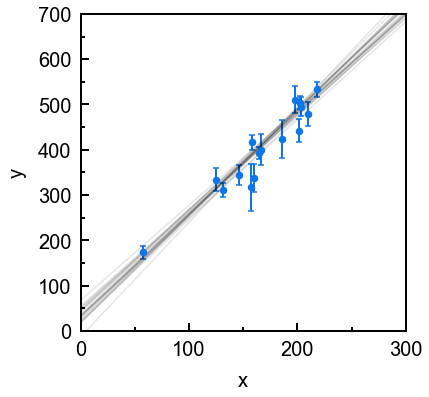

In [73]:
### Start MCMC
iterations=iterations
bar=progressbar.ProgressBar(max_value=iterations)
for i, result in enumerate(sampler.sample(pos, iterations=iterations)):
    bar.update(i)
### Finish MCMC

samples=sampler.chain[:,:,:].reshape((-1,ndim)) # shape = (nsteps, ndim)

df0=pd.DataFrame(samples)
df0.to_csv(path_or_buf='samplesout_.csv',sep=',')
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)
            
#plot_helper.plottraces(samples,labels,parametertruths,nwalkers,iterations,1)
fig=corner.corner(samplesnoburn, labels=labels,truths=None,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 10},verbose=False)
fig.savefig("triangle.pdf")

plot_helper.plot3(x,y,yerr,samplesnoburn,[0,300],[0,700])

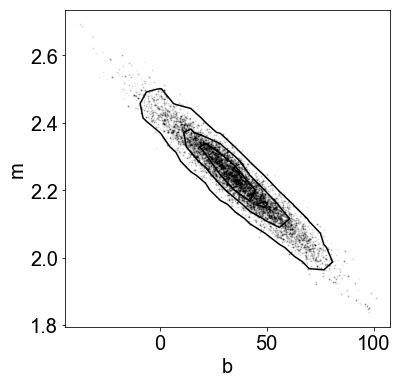

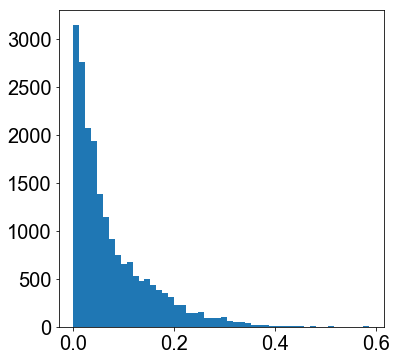

In [74]:
ndim,nwalkers,threads,iterations,tburn=5,100,8,5000,2500
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)

size=20000

marr=samplesnoburn[:size,1]
barr=samplesnoburn[:size,0]
Pbarr=samplesnoburn[:size,2]

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)

xbins, ybins, sigma = compute_sigma_level(barr, marr)
plt.contour(xbins, ybins, sigma.T, levels=[0.393,0.683, 0.955],colors='k')
plt.plot(barr, marr, 'ok',ms=1, alpha=0.05); 
ax=plt.gca(); ax.set_xlabel('b'); ax.set_ylabel('m'); plt.show()

plt.hist(Pbarr,bins=50); plt.show()



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
N/A% (0 of 20000) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encount

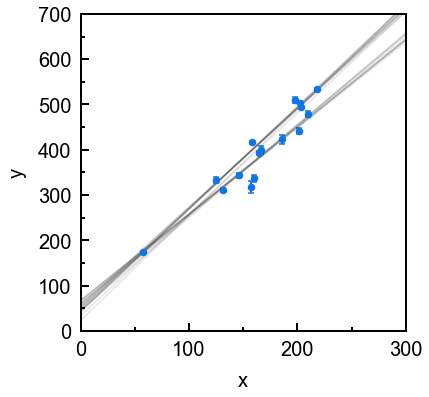

In [86]:
ndim,nwalkers,threads,iterations,tburn=5,100,8,20000,10000

yerr=df['sy'].iloc[4:].values/4
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnprob,a=2,args=(x,y,yerr),threads=threads)
### Start MCMC
iterations=iterations
bar=progressbar.ProgressBar(max_value=iterations)
for i, result in enumerate(sampler.sample(pos, iterations=iterations)):
    bar.update(i)
### Finish MCMC

samples=sampler.chain[:,:,:].reshape((-1,ndim)) # shape = (nsteps, ndim)

df0=pd.DataFrame(samples)
df0.to_csv(path_or_buf='samplesout_.csv',sep=',')
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)
            
#plot_helper.plottraces(samples,labels,parametertruths,nwalkers,iterations,1)
fig=corner.corner(samplesnoburn, labels=labels,truths=None,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 10},verbose=False)
fig.savefig("triangle.pdf")

plot_helper.plot3(x,y,yerr,samplesnoburn,[0,300],[0,700])

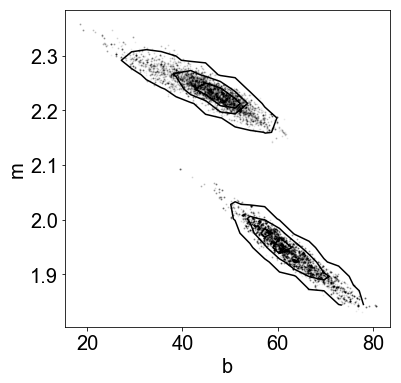

In [87]:
size=20000

marr=samplesnoburn[:size,1]
barr=samplesnoburn[:size,0]

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)

xbins, ybins, sigma = compute_sigma_level(barr, marr)
plt.contour(xbins, ybins, sigma.T, levels=[0.393,0.683, 0.955],colors='k')
plt.plot(barr, marr, 'ok',ms=1, alpha=0.05); 
ax=plt.gca(); ax.set_xlabel('b'); ax.set_ylabel('m'); plt.show()




The posterior distribution can become multimodal when observational uncertainties are underestimated.

In [92]:
N=16
print(N-2)
print(N-2+np.sqrt(2*N-2))
print(N-2-np.sqrt(2*N-2))

14
19.4772255751
8.52277442495


# Exercise 12: Bayesian uncertainty estimation

In [6]:
# Here our errors syi^2=S which we infer.

def lnlike(theta,x,y):
    b,m,Pb,Yb,lnVb,S=theta
    Vb=np.exp(lnVb)
    like=np.prod((1-Pb)/(np.sqrt(2*np.pi*S))*np.exp(-(y-m*x-b)**2/(2*S))+Pb/(np.sqrt(2*np.pi*(Vb+S)))*np.exp(-(y-Yb)**2/(2*(Vb+S))))

    return np.log(like)

def lnprior(theta):
    b,m,Pb,Yb,lnVb,S=theta
    
    if not (-100<b<150 and 0<m<5 and 0<Pb<1 and 0<Yb<1000 and -5<lnVb<5 and 100<S<5000) : 
        return -np.inf # Hard-cutoff for positive value constraint    
    return 0

def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

x=df['x'].iloc[4:].values
y=df['y'].iloc[4:].values

ndim,nwalkers,threads,iterations,tburn=6,100,8,5000,2500
labels=["$b$","$m$","$Pb$","$Yb$","$lnVb$","$S$"]
#parametertruths=[1,2]
pos=[np.array([
    34.04772776*(1+0.05*np.random.randn()),
    2.23992083*(1+0.05*np.random.randn()),
    0.5*(1+0.05*np.random.randn()),
    500*(1+0.05*np.random.randn()),
    1*(1+0.05*np.random.randn()),
    700*(1+0.05*np.random.randn())]) for i in range(nwalkers)]
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnprob,a=2,args=(x,y),threads=threads)

 99% (4997 of 5000) |#################### | Elapsed Time: 0:00:54 ETA:  0:00:00

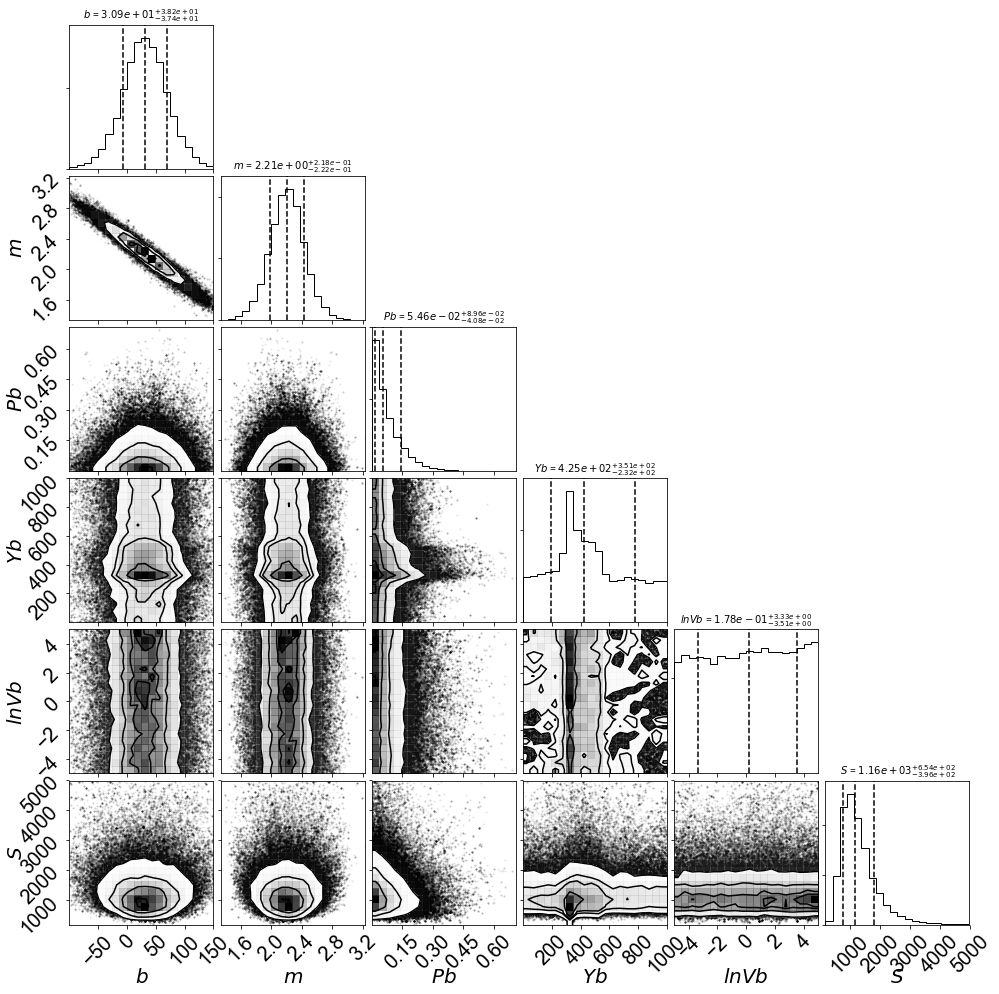

In [7]:
### Start MCMC
iterations=iterations
bar=progressbar.ProgressBar(max_value=iterations)
for i, result in enumerate(sampler.sample(pos, iterations=iterations)):
    bar.update(i)
### Finish MCMC

samples=sampler.chain[:,:,:].reshape((-1,ndim)) # shape = (nsteps, ndim)

df0=pd.DataFrame(samples)
df0.to_csv(path_or_buf='samplesout_.csv',sep=',')
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)
            
#plot_helper.plottraces(samples,labels,parametertruths,nwalkers,iterations,1)
fig=corner.corner(samplesnoburn, labels=labels,truths=None,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 10},verbose=False)
fig.savefig("triangle.pdf")

#plot_helper.plot3(x,y,np.ones(len(x))*S,samplesnoburn,[0,300],[0,700])

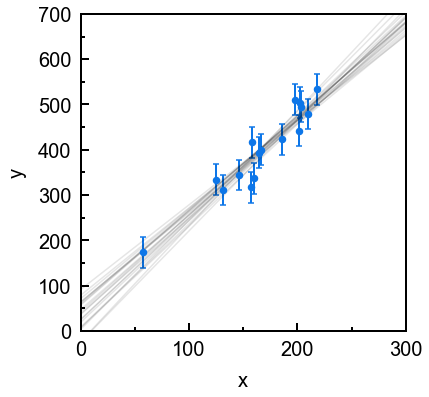

In [9]:
x=df['x'].iloc[4:].values
y=df['y'].iloc[4:].values
S=1.16e3
ndim,nwalkers,threads,iterations,tburn=6,100,8,5000,2500
samplesnoburn=plot_helper.readsamples('samplesout_.csv',tburn,nwalkers,iterations)

plot_helper.plot4(x,y,np.ones(len(x))*np.sqrt(S),samplesnoburn,[0,300],[0,700])